<a href="https://colab.research.google.com/github/natt001og/Tarea2SO/blob/main/Tarea1_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)
import shutil

dest_path = "/content/"
shutil.copytree(path, dest_path, dirs_exist_ok=True)

print("Ubicación del dataset:", dest_path)

Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1
Ubicación del dataset: /content/


https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset

In [2]:
!pip install pandas


In [3]:
import pandas as pd

# Suponiendo que el dataset es un archivo CSV, primero carga el archivo
dataset_path = "/content/student_depression_dataset.csv"  # Ajusta este nombre si es diferente
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset para verificar el formato y las columnas
print("Primeras filas del dataset:")
print(df.head())

# Verificar los nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)

# Verificar el número de filas y columnas
print("\nNúmero de filas y columnas:")
print(df.shape)


Primeras filas del dataset:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'      

In [4]:
# Seleccionar solo las primeras 10,500 filas
df_subset = df.iloc[:10500]

# Verificar las primeras filas de la submuestra
print("Primeras filas de la submuestra:")
print(df_subset.head())

# Verificar el número de filas y columnas de la submuestra
print("\nNúmero de filas y columnas de la submuestra:")
print(df_subset.shape)


Primeras filas de la submuestra:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours' 

In [5]:
# Eliminar las columnas 'id', 'City' y 'Profession'
df_subset= df_subset.drop(columns=['id', 'City', 'Profession'])

# Verificar las primeras filas del dataset después de eliminar las columnas
print("Primeras filas del dataset limpio:")
print(df_subset.head())

# Verificar las columnas restantes
print("\nNombres de las columnas restantes:")
print(df_subset.columns)


Primeras filas del dataset limpio:
   Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0    Male  33.0                5.0            0.0  8.97                 2.0   
1  Female  24.0                2.0            0.0  5.90                 5.0   
2    Male  31.0                3.0            0.0  7.03                 5.0   
3  Female  28.0                3.0            0.0  5.59                 2.0   
4  Female  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction       Sleep Duration Dietary Habits   Degree  \
0               0.0          '5-6 hours'        Healthy  B.Pharm   
1               0.0          '5-6 hours'       Moderate      BSc   
2               0.0  'Less than 5 hours'        Healthy       BA   
3               0.0          '7-8 hours'       Moderate      BCA   
4               0.0          '5-6 hours'       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0  

In [6]:
df_subset= df_subset.drop(columns=['Sleep Duration'])
print(df_subset.dtypes)

Gender                                    object
Age                                      float64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [7]:
df_subset['Gender'] = df_subset['Gender'].astype('category')
df_subset['Dietary Habits'] = df_subset['Dietary Habits'].astype('category')
df_subset['Degree'] = df_subset['Degree'].astype('category')

# Convertir columnas booleanas
df_subset['Have you ever had suicidal thoughts ?'] = df_subset['Have you ever had suicidal thoughts ?'].map({'Yes': True, 'No': False})
df_subset['Family History of Mental Illness'] = df_subset['Family History of Mental Illness'].map({'Yes': True, 'No': False})
df_subset['Depression'] = df_subset['Depression'].astype(bool)

# Verificar los tipos de datos después de la conversión

print(df_subset.dtypes)

Gender                                   category
Age                                       float64
Academic Pressure                         float64
Work Pressure                             float64
CGPA                                      float64
Study Satisfaction                        float64
Job Satisfaction                          float64
Dietary Habits                           category
Degree                                   category
Have you ever had suicidal thoughts ?        bool
Work/Study Hours                          float64
Financial Stress                           object
Family History of Mental Illness             bool
Depression                                   bool
dtype: object


In [8]:
!pip uninstall pgmpy
!pip install pgmpy==0.1.18

!pip install bnlearn

Found existing installation: pgmpy 0.1.18
Uninstalling pgmpy-0.1.18:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pgmpy-0.1.18.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pgmpy/*
Proceed (Y/n)? y
  Successfully uninstalled pgmpy-0.1.18
  Using cached pgmpy-0.1.18-py3-none-any.whl.metadata (6.3 kB)
Using cached pgmpy-0.1.18-py3-none-any.whl (1.9 MB)


In [9]:
import bnlearn as bn

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [cs]
[bnlearn] >Build skeleton with [chi_square] and alpha=0.05


  0%|          | 0/5 [00:00<?, ?it/s]

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  File "/usr/local/lib/python3.11/dist-packages/bnlearn/structure_learning.py", line 265, in fit
    out = _constraintsearch(df, n_jobs=config['n_jobs'], significance_level=params_pc['alpha'], ci_test=params_pc['ci_test'], verbose=config['verbose'])
  File "/usr/local/lib/python3.11/dist-packages/bnlearn/structure_learning.py", line 470, in _constraintsearch
    skel, seperating_sets = model.build_skeleton(significance_level=significance_level, ci_test=ci_test)
  File "/usr/local/lib/python3.11/dist-packages/pgmpy/estimators/PC.py", line 320, in build_skeleton
    if ci_test(
  File "/usr/local/lib/python3.11/dist-packages/pgmpy/estimators/CITests.py", line 95, in chi_square
    return power_divergence(
  File "/usr/local/lib/python3.11/dist-packages/pgmpy/estimators/CITests.py", line 565, in power_divergence
    logging.info(
Message: 'Skipping the test Dietary Habits ⟂ Depression | Study Satisfaction=4.0, Work/Study H

  0%|          | 0/5 [00:00<?, ?it/s]

Se truncaron las últimas líneas 5000 del resultado de transmisión.
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 690, in format
    s = self.formatMessage(record)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 659, in formatMessage
    return self._style.format(record)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 449, in format
    return self._format(record)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 445, in _format
    return self._fmt % values
           ~~~~~~~~~~^~~~~~~~
ValueError: unsupported format character ']' (0x5d) at index 20
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
 

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


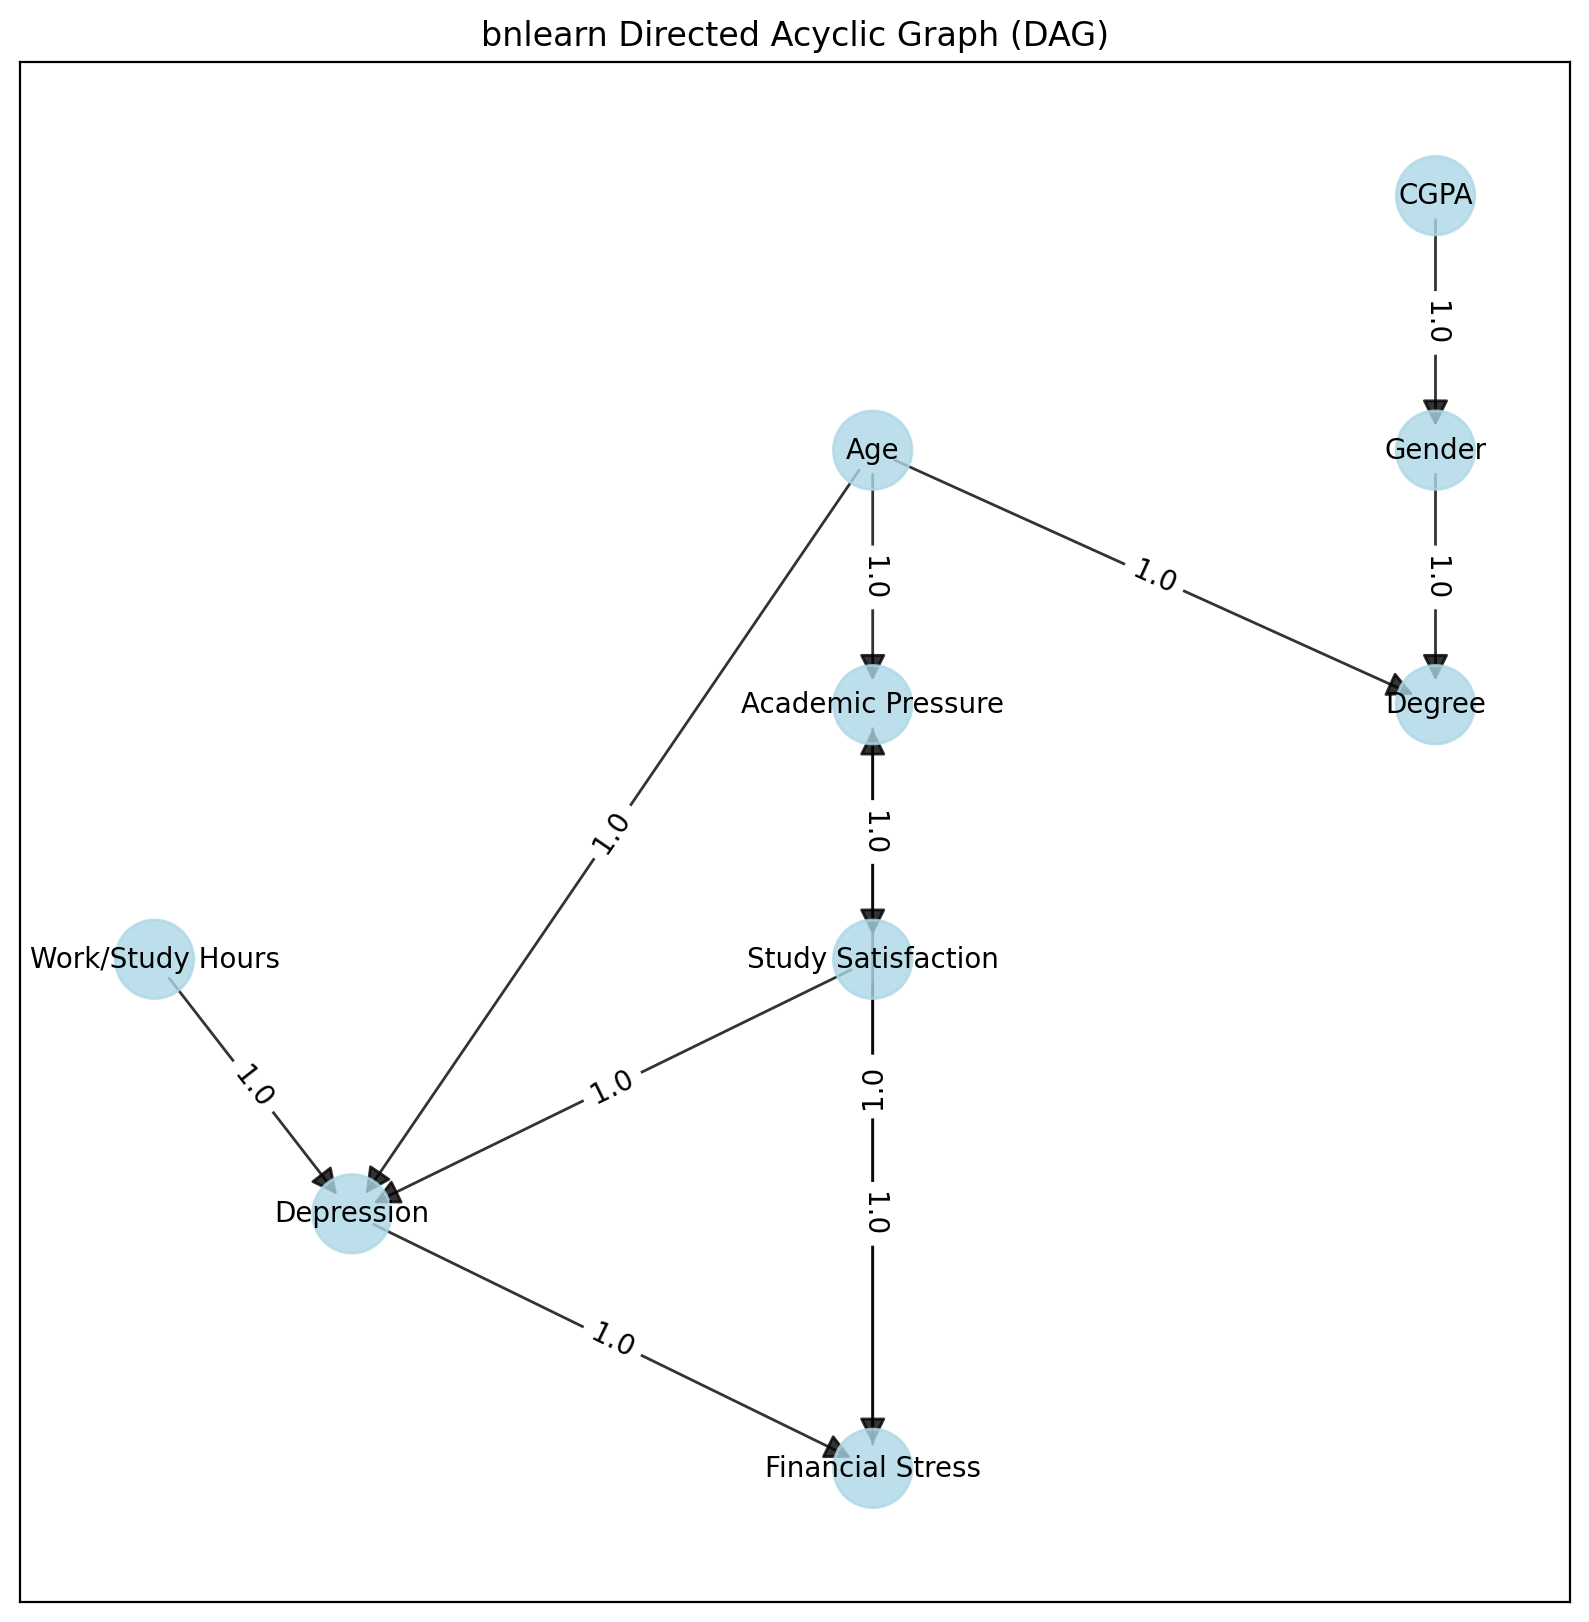

In [10]:
model_cs = bn.structure_learning.fit(df_subset, methodtype='cs')
# Plot detected DAG
G = bn.plot(model_cs)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


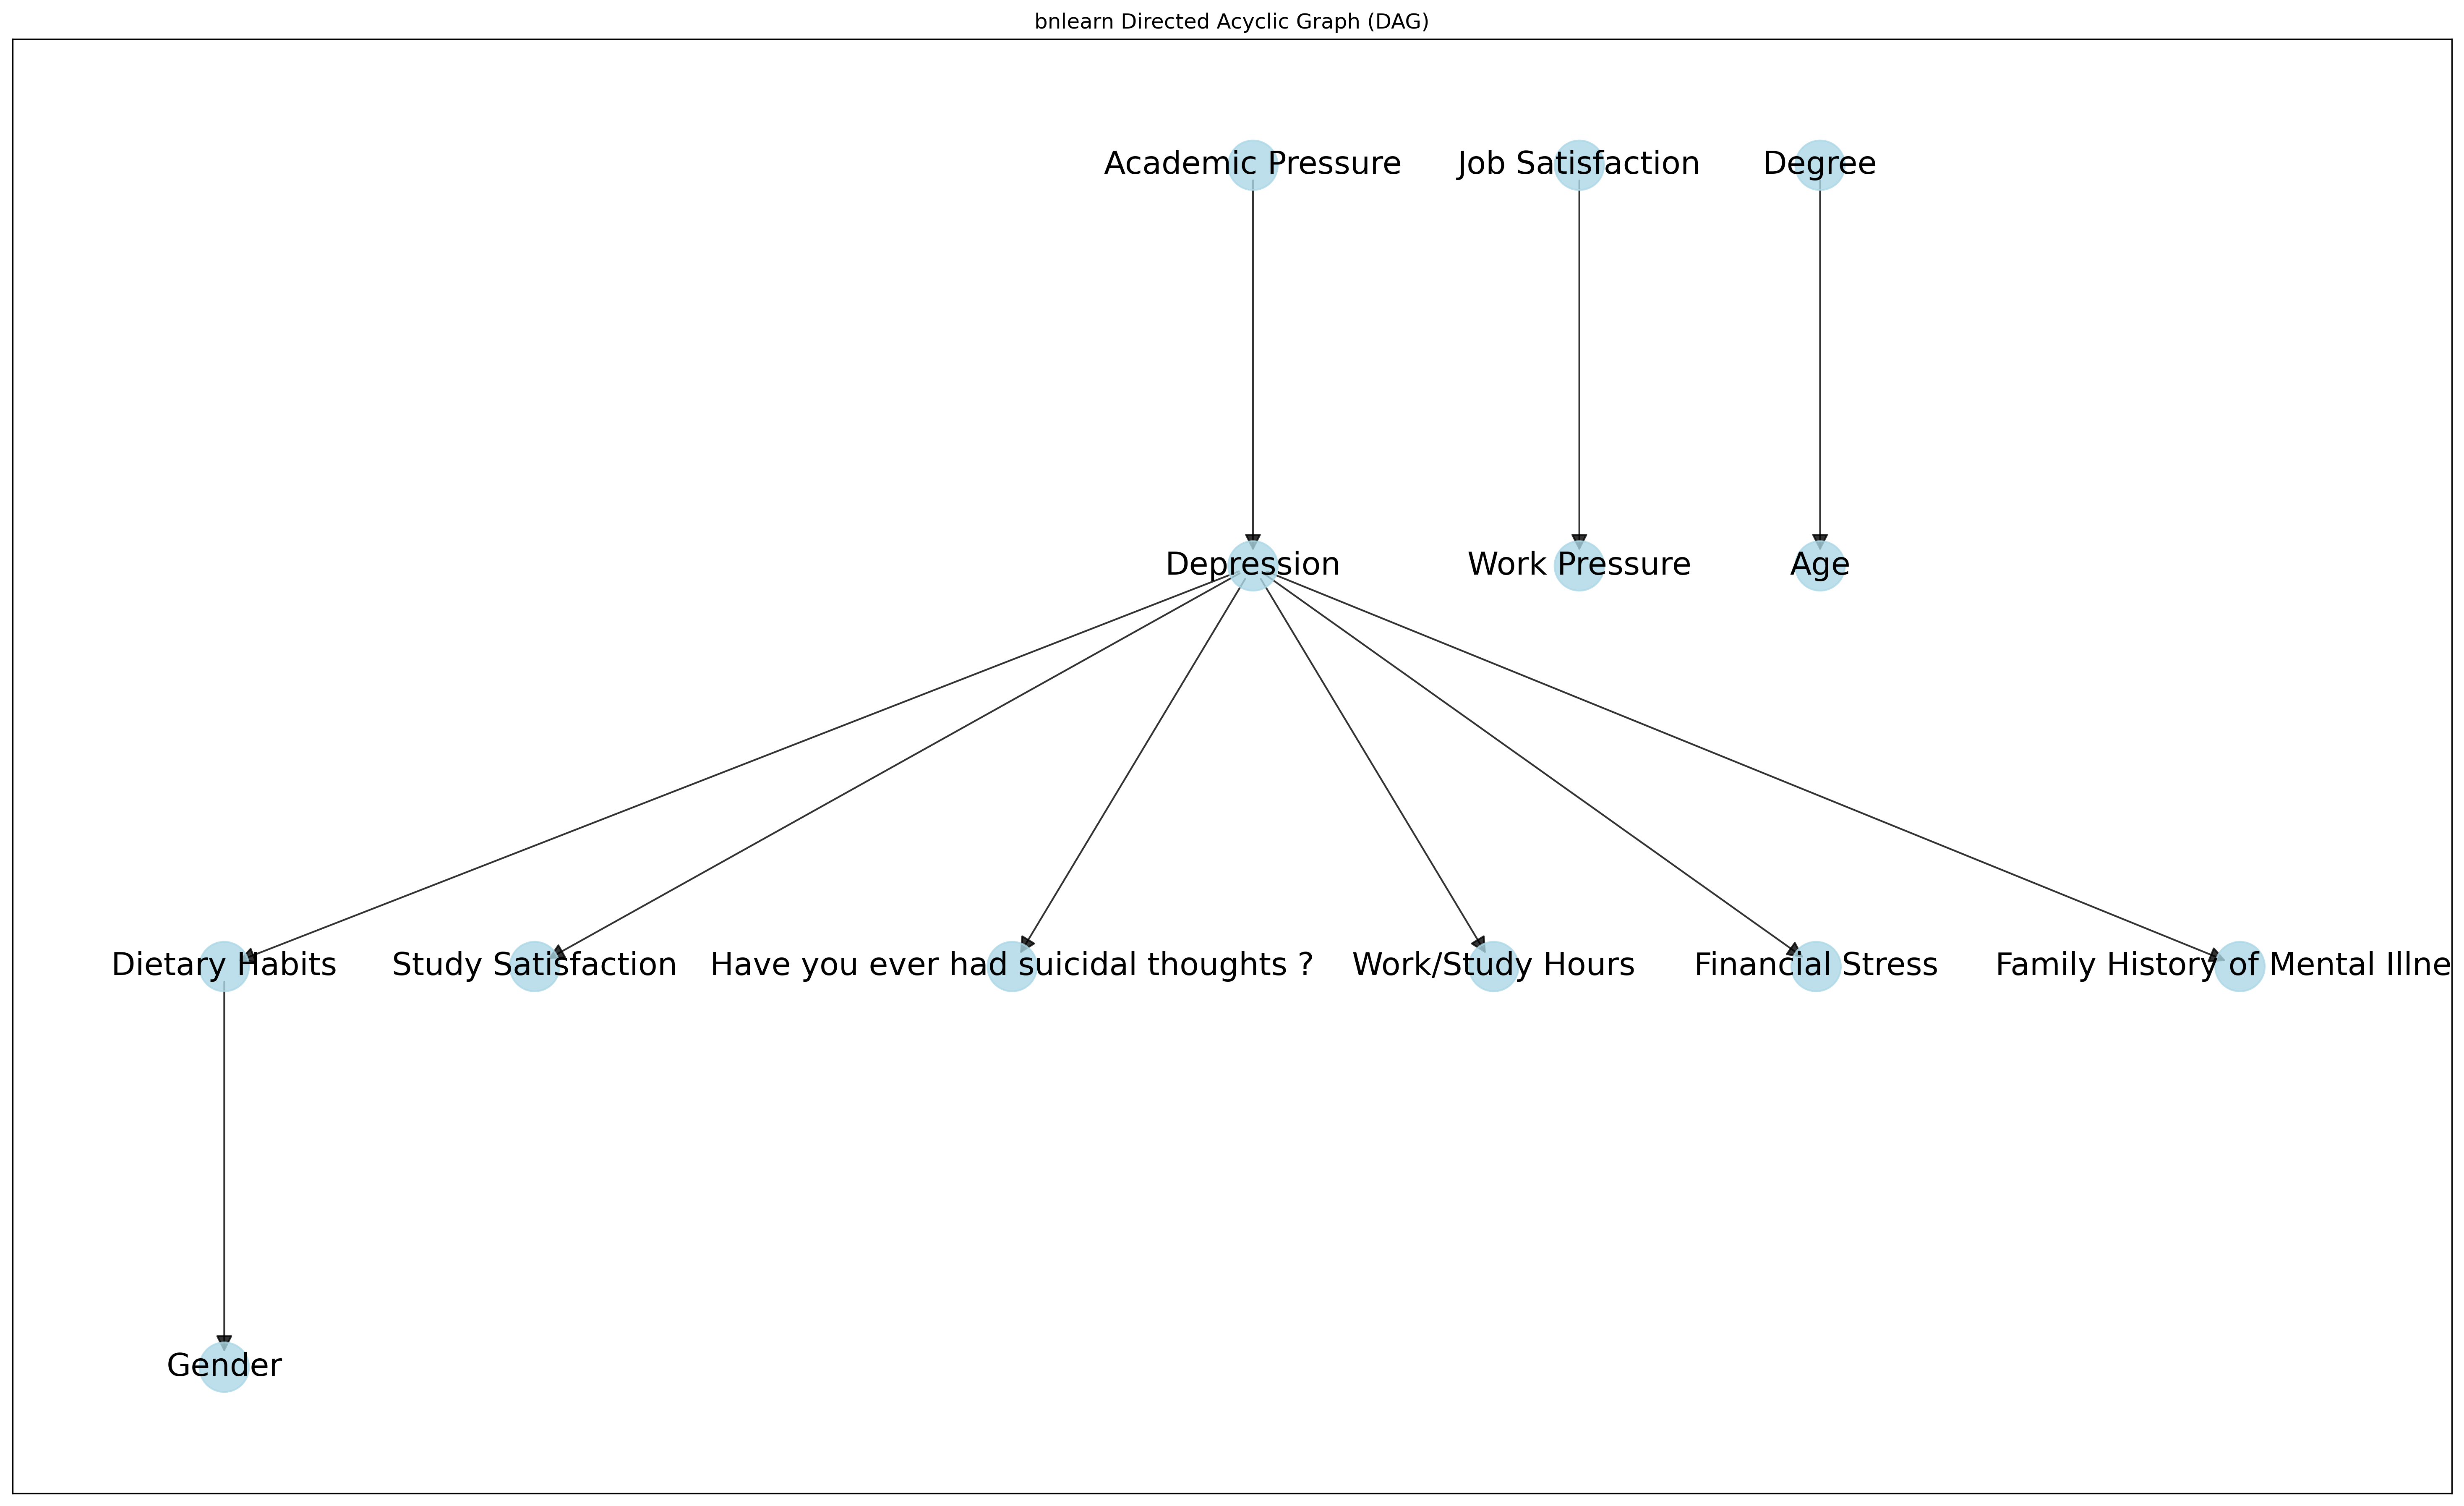

In [11]:
model_hc = bn.structure_learning.fit(df_subset, methodtype='hc', scoretype='bic')
G = bn.plot(model_hc, params_static={'figsize': (25, 15), 'dpi': 300, 'font_size': 18}, edge_labels=None)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


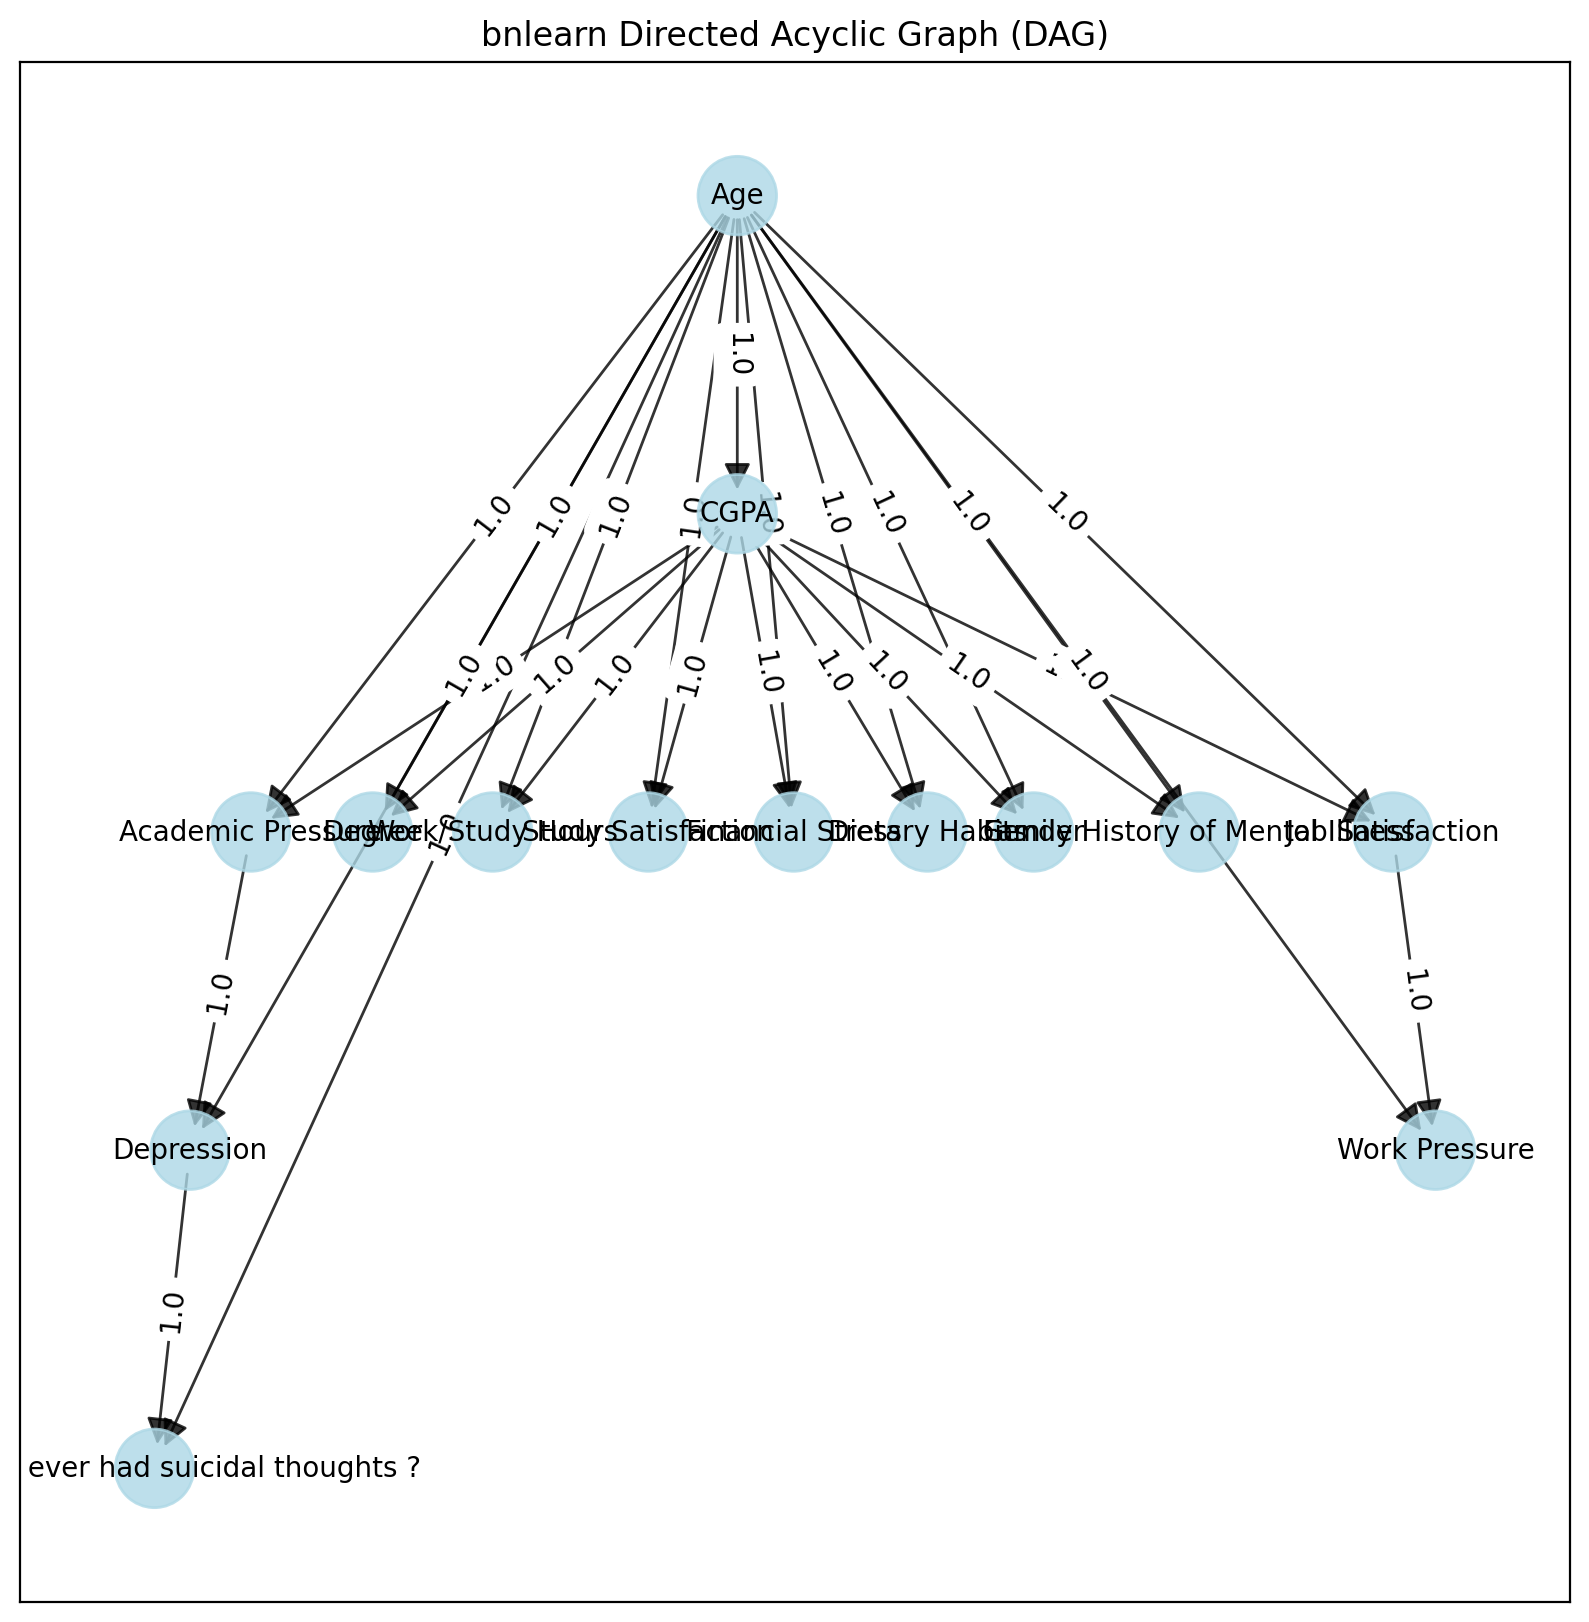

In [16]:
model_tan = bn.structure_learning.fit(df_subset, methodtype='tan', class_node='Age')
# Plot detected DAG
G = bn.plot(model_tan)